# Demographics Analysis

Aim: find whether the patients being used are outliers which could interfere with the classification.

### Step 1: import data and separate into trinary classes.

In [3]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('actionable_data/Clinical indicators.xlsx')

# Convert data to array
data_array = df.values

# Get column names as a separate list
column_names = df.columns.tolist()

print(column_names)
print(data_array)

['number', 'gender', 'age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)', 'Diabetic Complications', 'Diabetic nephropathy', 'Diabetic retinopathy and cataract', 'Diabetic peripheral neuropathy', 'Coronary artery disease and cardiac insufficiency', 'Lower extremity atherosclerosis or stenosis', 'Carotid plaque']
[[20050628 'male' 48 ... 0.0 0.0 0.0]
 [20052606 'male' 38 ... 0.0 0.0 0.0]
 [20061729 'male' 41 ... 0.0 0.0 0.0]
 ...
 [20123037 'male' 49 ... 0.0 0.0 0.0]
 [20124047 'male' 49 ... 0.0 0.0 0.0]
 [20125096 'male' 74 ... 1.0 0.0 0.0]]


As we can see, all patients have been imported but we are only interested in those which have ECG data in 3 classes:

1. Diabetics
2. Diabetics with other complications
3. DPN patients

We know in advance the patient ids of each class

In [4]:
Diabetics= ['19070921', '19072205', '19072214', '19072938', '19072939', '19072940', '19080106', '19081506', '19082406', '19090308', '19090320', '19102102', '19102524', '19112609', '19121303', '19121735', '20050628', '20052606', '20061729', '20120922', '20121033', '20121718']
Diabetics_complications= ['19080715', '19101607', '19102103', '19102622', '19120302', '19120323', '19120704', '19120723', '20010827', '20011712', '20092226', '20092535', '20101424', '20102029', '20120116', '20121716', '20122932']
Diabetics_DPN= ['19101619', '20010826', '20101822', '20123017']
#covert to integer values for lookup
Diabetics = [int(x) for x in Diabetics]
Diabetics_complications = [int(x) for x in Diabetics_complications]
Diabetics_DPN = [int(x) for x in Diabetics_DPN]
#create 3 separate dataframes for each class
df1 = df[df['number'].isin(Diabetics)].copy()
df2 = df[df['number'].isin(Diabetics_complications)].copy()
df3 = df[df['number'].isin(Diabetics_DPN)].copy()
print(len(Diabetics_complications))

17


Now i will reassemble the dataframe adding a category column

In [5]:
df1['Category'] = 'Diabetic'
df2['Category'] = 'Other Complications'
df3['Category'] = 'DPN'

reassembled_df = pd.concat([df1, df2, df3], ignore_index=True)

# Verify the result
#print(reassembled_df.columns.tolist)
#print(reassembled_df['Category'].value_counts())

### Step 2: Creating Trinary Plots

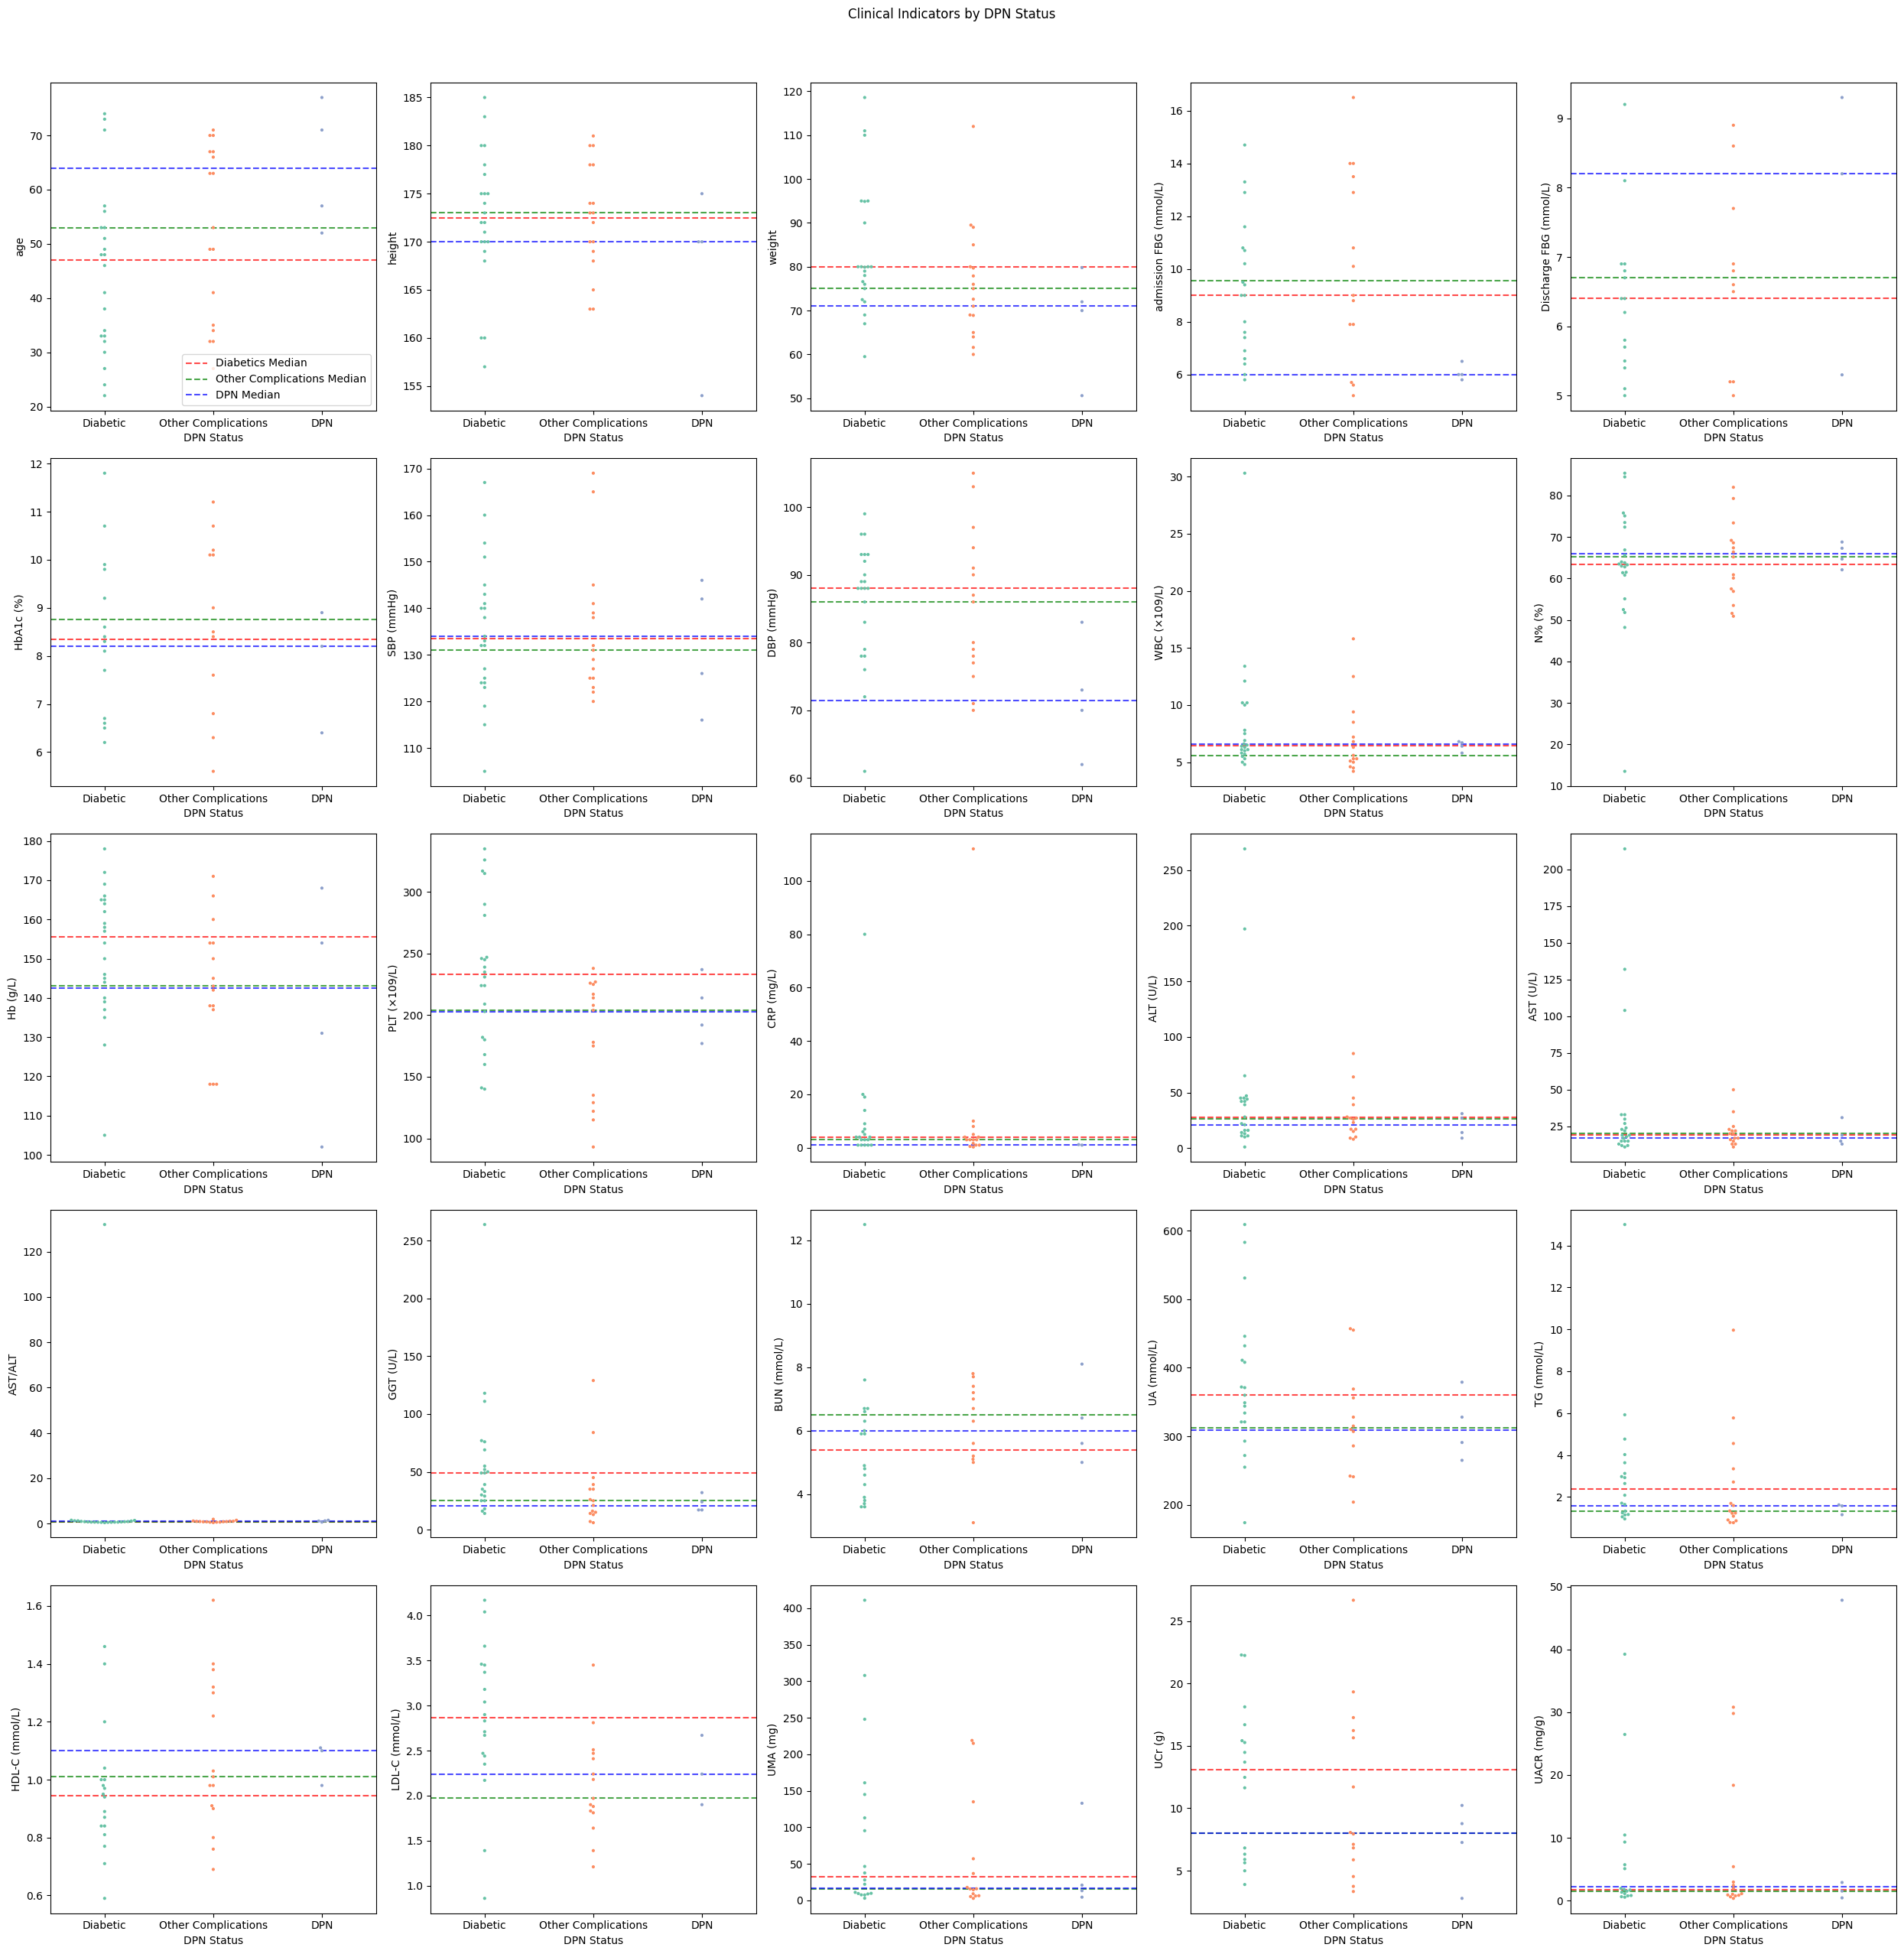

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
median_Diabetics = []
median_Complications = []
median_DPN = []

for i in range(25):
     median_Diabetics.append(reassembled_df[reassembled_df['Category'] == 'Diabetic'][column_names[2+i]].median())
     median_Complications.append(reassembled_df[reassembled_df['Category'] == 'Other Complications'][column_names[2+i]].median())
     median_DPN.append(reassembled_df[reassembled_df['Category'] == 'DPN'][column_names[2+i]].median())     


# Create figure and subplots
fig, axes = plt.subplots(5, 5, figsize=(25, 25))
fig.suptitle('Clinical Indicators by DPN Status', y=1.02)

# Flatten axes array for easy iteration
axes = axes.flatten()
counter=2
# Create beeswarm plots in each subplot
for ax in axes:
    sns.swarmplot(x='Category', y=column_names[counter], data=reassembled_df, hue='Category', palette='Set2', size=3, ax=ax)
    # Add mean lines
    ax.axhline(median_Diabetics[counter-2], color='red', linestyle='--', alpha=0.7, label='Diabetics Median')
    ax.axhline(median_Complications[counter-2], color='green', linestyle='--', alpha=0.7, label='Other Complications Median')
    ax.axhline(median_DPN[counter-2], color='blue', linestyle='--', alpha=0.7, label='DPN Median')
    ax.set_xlabel('DPN Status')
    ax.set_ylabel(column_names[counter])
    counter+=1
    if ax == axes[0]:
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Step 3: Create BMI Figure as Priya Said it Would be Interesting to Look at


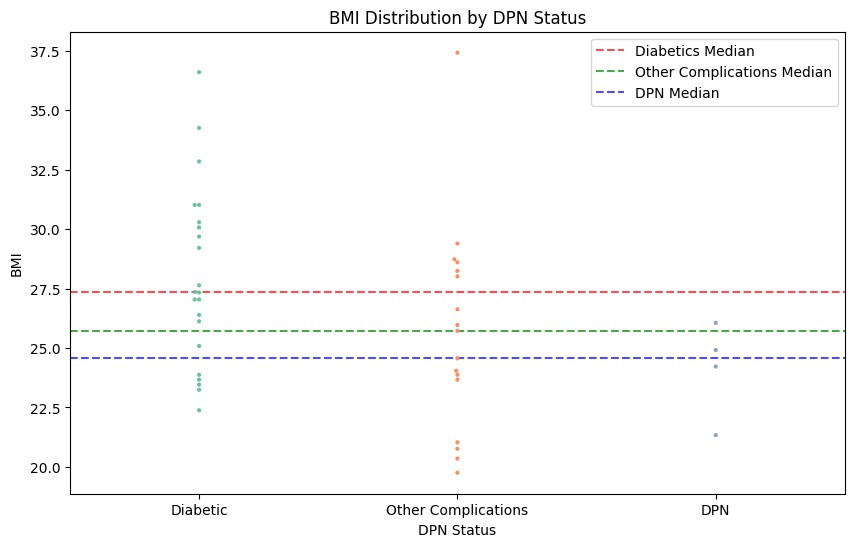

In [7]:
reassembled_df['BMI'] = reassembled_df['weight'] / ((reassembled_df['height']*0.01) ** 2)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Category', y='BMI', data=reassembled_df, hue='Category', palette='Set2', size=3)

# Add labels and title
plt.xlabel('DPN Status')
plt.ylabel('BMI')
plt.title('BMI Distribution by DPN Status')
plt.axhline(reassembled_df[reassembled_df['Category'] == 'Diabetic']['BMI'].median(), color='red', linestyle='--', alpha=0.7, label='Diabetics Median')
plt.axhline(reassembled_df[reassembled_df['Category'] == 'Other Complications']['BMI'].median(), color='green', linestyle='--', alpha=0.7, label='Other Complications Median')
plt.axhline(reassembled_df[reassembled_df['Category'] == 'DPN']['BMI'].median(), color='blue', linestyle='--', alpha=0.7, label='DPN Median')
plt.legend()
# Show plot
plt.show()

### Step 4: Outlier Analysis

will do a normality test on each category then run a modified z score since each category has few data points. this will give us a value for each of the patients in each indication which can be plotted on a heatmap to easily discern how outlying the data is.

Firstly we will look at DPN patients as there are the fewest values.

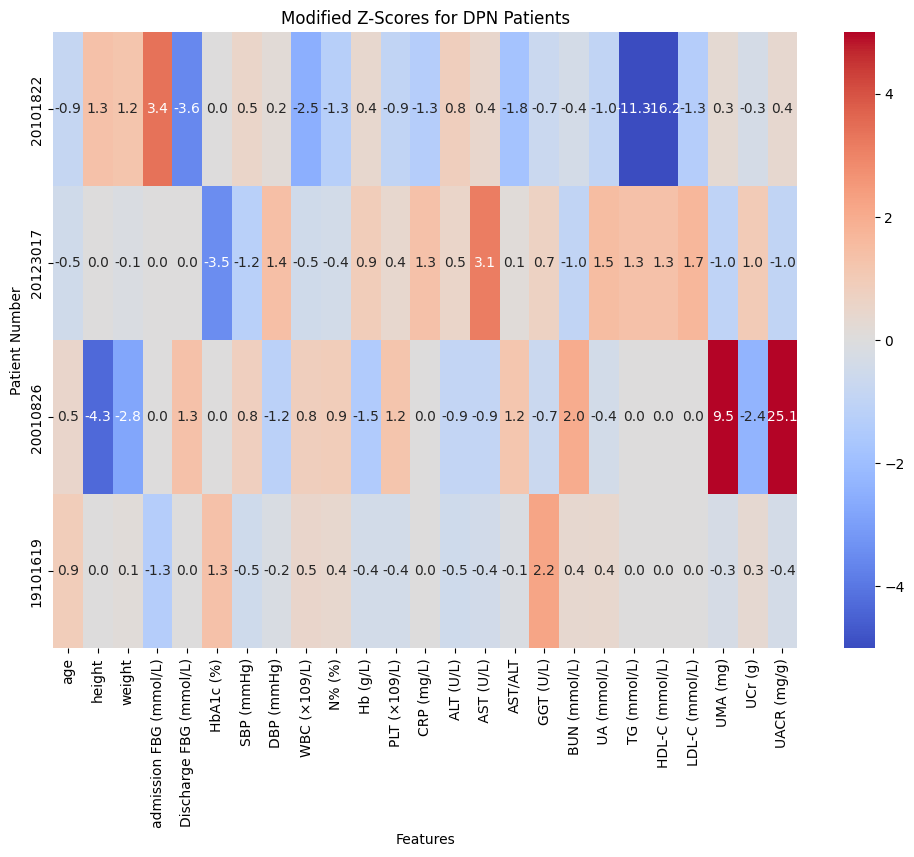

In [8]:
from scipy.stats import median_abs_deviation

dpn_patients = reassembled_df[reassembled_df['Category'] == 'DPN']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = dpn_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for DPN Patients')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

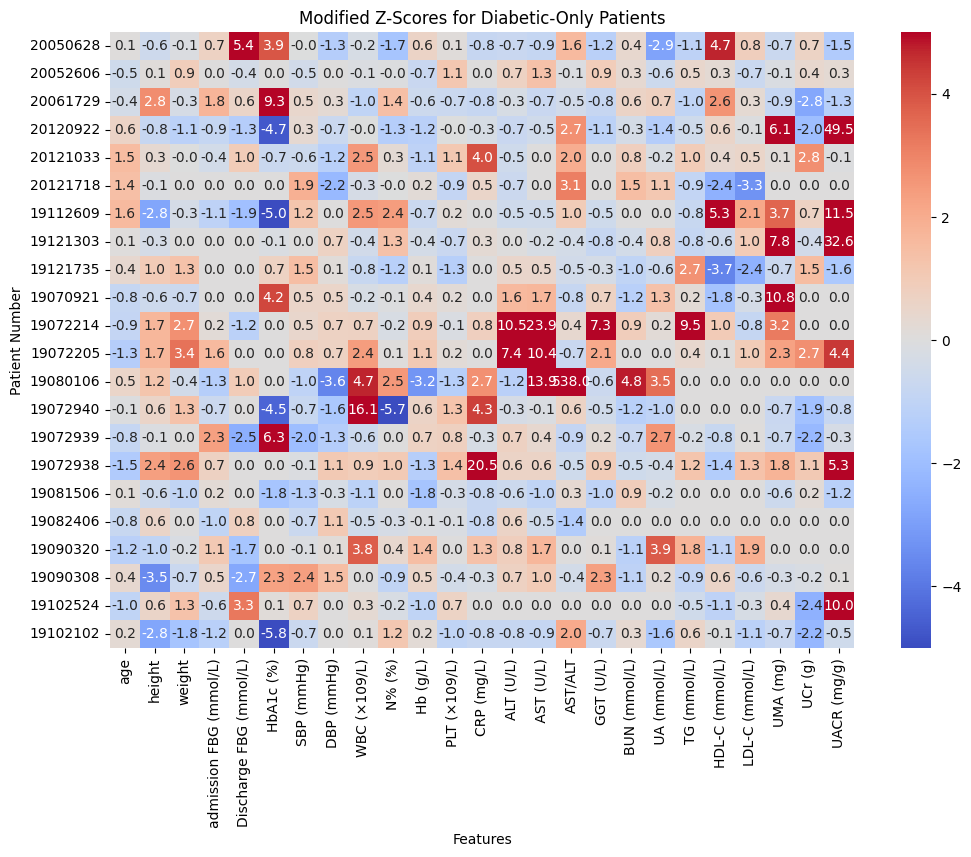

In [9]:
Diabetic_patients = reassembled_df[reassembled_df['Category'] == 'Diabetic']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = Diabetic_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for Diabetic-Only Patients')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

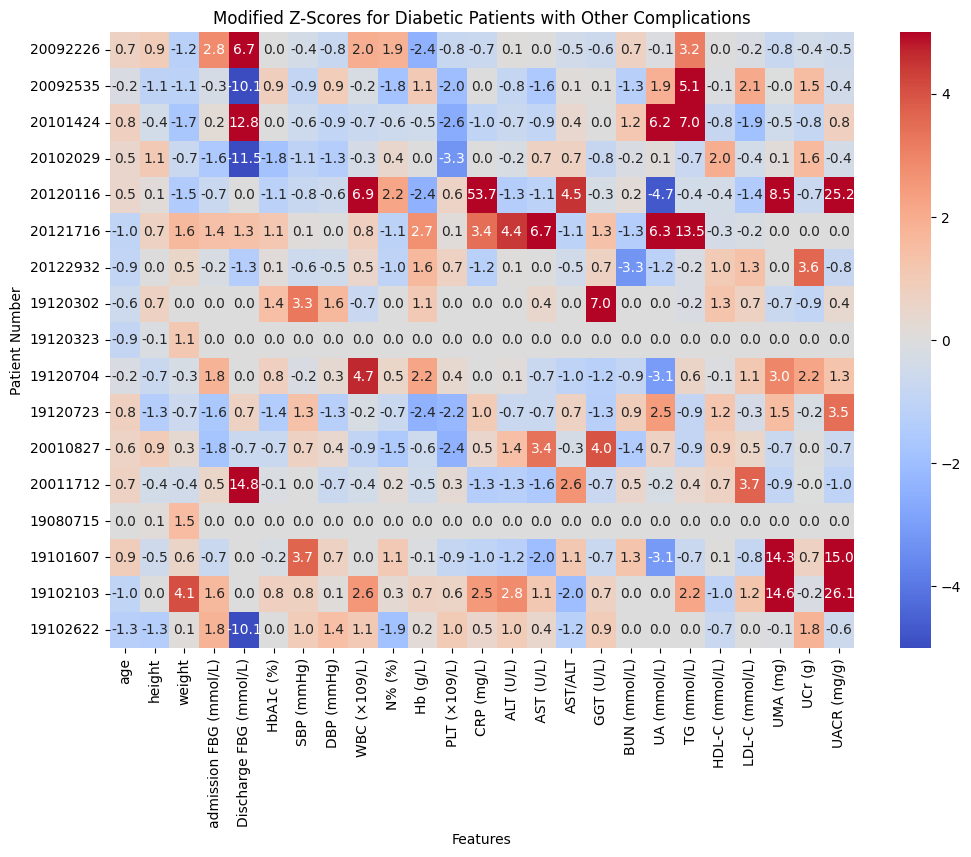

In [10]:
Diabetic_comp_patients = reassembled_df[reassembled_df['Category'] == 'Other Complications']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = Diabetic_comp_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for Diabetic Patients with Other Complications')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

### Normality test

In [19]:
from scipy.stats import shapiro
boolean_normality = []
test_stats = []
p_values= []
def test_normality(data, column):
    """Test normality of a column using Shapiro-Wilk test, with debugging info"""
    # Convert to numeric and drop NaN values
    clean_data = pd.to_numeric(data[column], errors='coerce').dropna()
    
    # Print debugging information
    print(f"\nTesting column: {column}")
    print(f"Original length: {len(data[column])}")
    print(f"Valid values: {len(clean_data)}")
    
    # If there's not enough data after cleaning
    if len(clean_data) < 3:
        print("WARNING: Not enough valid values for Shapiro-Wilk test (needs ≥3)")
        test_stats.append(float('nan'))
        p_values.append(float('nan'))
        boolean_normality.append(False)
        return
        
    stat, p = shapiro(clean_data)
    test_stats.append(stat)
    p_values.append(p)
    boolean_normality.append(p > 0.05)
    print(f"Test successful. Statistic: {stat:.3f}, p-value: {p:.3f}")

# List of numerical columns to test
numerical_columns = ['age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Test normality for each column
for column in numerical_columns:
    test_normality(Diabetic_patients, column)

# Create DataFrame with results
normality_df = pd.DataFrame({
    'Column': numerical_columns,
    'Normal': boolean_normality,
    'Statistic': test_stats,
    'p-value': p_values
})

normality_df


Testing column: age
Original length: 22
Valid values: 22
Test successful. Statistic: 0.946, p-value: 0.260

Testing column: height
Original length: 22
Valid values: 22
Test successful. Statistic: 0.954, p-value: 0.377

Testing column: weight
Original length: 22
Valid values: 22
Test successful. Statistic: 0.904, p-value: 0.036

Testing column: admission FBG (mmol/L)
Original length: 22
Valid values: 19
Test successful. Statistic: 0.950, p-value: 0.390

Testing column: Discharge FBG (mmol/L)
Original length: 22
Valid values: 15
Test successful. Statistic: 0.911, p-value: 0.138

Testing column: HbA1c (%)
Original length: 22
Valid values: 14
Test successful. Statistic: 0.954, p-value: 0.623

Testing column: SBP (mmHg)
Original length: 22
Valid values: 22
Test successful. Statistic: 0.987, p-value: 0.990

Testing column: DBP (mmHg)
Original length: 22
Valid values: 22
Test successful. Statistic: 0.914, p-value: 0.056

Testing column: WBC (×109/L)
Original length: 22
Valid values: 22
Test 

,Column,Normal,Statistic,p-value
0,age,True,0.945767,2.597492e-01
1,height,True,0.953907,3.766287e-01
2,weight,False,0.903967,3.571308e-02
3,admission FBG (mmol/L),True,0.949631,3.895291e-01
4,Discharge FBG (mmol/L),True,0.910543,1.380317e-01
5,HbA1c (%),True,0.953902,6.227477e-01
6,SBP (mmHg),True,0.987372,9.895840e-01
7,DBP (mmHg),True,0.913538,5.593074e-02
8,WBC (×109/L),False,0.577714,7.707849e-07
9,N% (%),False,0.845436,2.821934e-03
